In this notebook we will implement the regressions methods discussed in Week 1 and 2 by the Course of Andrew Ng.
We will focus on the more general method, instead of the linear only(only one feature), since the focus will be the veterozation of the equations, and use the power of NumPy to easily calculate it. We will plot the data though.
So instead of using $h_\theta(x) = \theta_{0} + \theta_{1}x_{1}$ we will always use the more general form, $h_\theta(x) = \sum_{j=0}^{j=n} \theta_{j}x_{j}$ where j is the number of features

So let us remind first about the definition of the cost function. Altough we gonna implement only the general form for j features, we will introduce here as for only one, and them generalize. This is because it is easy to see when we are dealing with only a straight line the intuition of the cost function:

# Cost Function $J(\theta)$ (MSE)

This cost function is defined as:

\begin{equation}
J(\theta) = \sum_{i=1}^{i=m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2}
\end{equation}

Where $x^{(i)}$ is our feature vector from the ith training sample. As remember that we are dealing with training sets, with the pairs (x,y) meaning that for the features x, we have the output y. We want to find the function h(x) that better maps this x->y, when we introduce a new unknown feature x, that gives us a good estimate for the value of y(good prediction). So the idea is to minimize the cost function, that tell us, for our given set of parameters $\theta$ how good our function h(x) is to the real value y.

Note: m is the number of training examples

Lets realize that, first this can see as two vectors multiplication:

\begin{equation}
J(\theta) = \frac{1}{2m}\sum_{i=1}^{i=m}(h_{\theta}(x^{(i)}) - y^{(i)}))(h_{\theta}(x^{(i)}) - y^{(i)})
\end{equation}

So we have two identical vectors where the ith component is giving by the difference:

\begin{equation}
\vec{v}
=
\begin{bmatrix}
h_{\theta}(x^{(1)}) - y^{(1)} \\
h_{\theta}(x^{(2)}) - y^{(2)} \\
\vdots \\
h_{\theta}(x^{(i)}) - y^{(i)}
\end{bmatrix}
\end{equation}


Remember where $x^{(i)}$ is the feature (input) of the $i^{th}$ training example, and $y^{(i)}$ is the correct output/target of the $i^{th}$ training example.

Therefore:

\begin{equation}
J(\theta) = \frac{1}{2m}\vec{v}^{T}\vec{v}
\end{equation}

# Gradient Descent

Since we need to minimize J to find the best values of $\theta$ that betters predict the target of our training set, this can be done with the gradient descent algorithm. It is well described on the course, so here we will just write the algorithm:

Repeat until converge:

\begin{equation}
\theta_{j} = \theta_{j} - \frac{\alpha}{m}\frac{\partial J(\theta)}{\partial \theta_{j}}
\end{equation}

Where $\alpha$ is called the learning rate. Is just the "size" of the step we take at each interaction. Note that $\alpha$ should always be small enough to guarantee that we dont overshoot the minimun. For regression, our hypothesis function is written as:
$h_\theta(x^{(i)}) = \sum_{j=0}^{j=n} \theta_{j}x^i_{j}$ remembering that $x_{j}^{i}$ is the value of the j-th feature for the i-th training sample, so $\frac{\partial h}{\partial \theta_{j}} = x^{i}_{j}$

So for our gradient descent, we have:

\begin{equation}
\theta_{j} = \theta_{j} - \frac{\alpha}{m}\sum_{i=1}^{i=m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j}
\end{equation}

So this is only a two vector component multiplication again! But notice since we have the indices "j", this means that the j-th value of the vector $\vec{\theta}$ is giving by vector matrix, and $x^{(i)}_{j}$ is the j-th row of the matrix $\textbf{X}$ where each row i  has the training example values for the training example j. in such way:

\begin{equation}
\textbf{X} =
\begin{bmatrix}
x_{0}^{(1)} & x_{0}^{(2)} & x_{0}^{(3)} & \dots & x_{0}^{(m)}\\
x_{1}^{(1)} & x_{1}^{(2)} & x_{1}^{(3)} & \dots & x_{1}^{(m)} \\
\vdots & \vdots & \vdots  & \vdots & \vdots\\
x_{n}^{(1)} & x_{n}^{(2)} & x_{n}^{(3)} & \dots & x_{n}^{(m)}          
\end{bmatrix}
\end{equation}

And $x_{0} = 1$ always. So we can just rewrite our gradient descent as:

\begin{equation}
\theta = \theta - \frac{\alpha}{m} \textbf{X}^{T}\vec{v}
\end{equation}

So our focus here will be implemeting these general forms. So we can do any kind of regression: polynomial, linear ... it will just depend how we build our features and matrix X. (for example with we want to do a quadratic fit only, we put all the values of the first column 1, and all the values of column 2 as input^2)


# Importing the data

In [1]:
with open("ex1data1.txt","r") as data:
    values = data.read()

In [2]:
values # Lets check how the data is

'6.1101,17.592\n5.5277,9.1302\n8.5186,13.662\n7.0032,11.854\n5.8598,6.8233\n8.3829,11.886\n7.4764,4.3483\n8.5781,12\n6.4862,6.5987\n5.0546,3.8166\n5.7107,3.2522\n14.164,15.505\n5.734,3.1551\n8.4084,7.2258\n5.6407,0.71618\n5.3794,3.5129\n6.3654,5.3048\n5.1301,0.56077\n6.4296,3.6518\n7.0708,5.3893\n6.1891,3.1386\n20.27,21.767\n5.4901,4.263\n6.3261,5.1875\n5.5649,3.0825\n18.945,22.638\n12.828,13.501\n10.957,7.0467\n13.176,14.692\n22.203,24.147\n5.2524,-1.22\n6.5894,5.9966\n9.2482,12.134\n5.8918,1.8495\n8.2111,6.5426\n7.9334,4.5623\n8.0959,4.1164\n5.6063,3.3928\n12.836,10.117\n6.3534,5.4974\n5.4069,0.55657\n6.8825,3.9115\n11.708,5.3854\n5.7737,2.4406\n7.8247,6.7318\n7.0931,1.0463\n5.0702,5.1337\n5.8014,1.844\n11.7,8.0043\n5.5416,1.0179\n7.5402,6.7504\n5.3077,1.8396\n7.4239,4.2885\n7.6031,4.9981\n6.3328,1.4233\n6.3589,-1.4211\n6.2742,2.4756\n5.6397,4.6042\n9.3102,3.9624\n9.4536,5.4141\n8.8254,5.1694\n5.1793,-0.74279\n21.279,17.929\n14.908,12.054\n18.959,17.054\n7.2182,4.8852\n8.2951,5.7442\

In [3]:
values = values.split("\n") # lets clean these \n

In [4]:
values

['6.1101,17.592',
 '5.5277,9.1302',
 '8.5186,13.662',
 '7.0032,11.854',
 '5.8598,6.8233',
 '8.3829,11.886',
 '7.4764,4.3483',
 '8.5781,12',
 '6.4862,6.5987',
 '5.0546,3.8166',
 '5.7107,3.2522',
 '14.164,15.505',
 '5.734,3.1551',
 '8.4084,7.2258',
 '5.6407,0.71618',
 '5.3794,3.5129',
 '6.3654,5.3048',
 '5.1301,0.56077',
 '6.4296,3.6518',
 '7.0708,5.3893',
 '6.1891,3.1386',
 '20.27,21.767',
 '5.4901,4.263',
 '6.3261,5.1875',
 '5.5649,3.0825',
 '18.945,22.638',
 '12.828,13.501',
 '10.957,7.0467',
 '13.176,14.692',
 '22.203,24.147',
 '5.2524,-1.22',
 '6.5894,5.9966',
 '9.2482,12.134',
 '5.8918,1.8495',
 '8.2111,6.5426',
 '7.9334,4.5623',
 '8.0959,4.1164',
 '5.6063,3.3928',
 '12.836,10.117',
 '6.3534,5.4974',
 '5.4069,0.55657',
 '6.8825,3.9115',
 '11.708,5.3854',
 '5.7737,2.4406',
 '7.8247,6.7318',
 '7.0931,1.0463',
 '5.0702,5.1337',
 '5.8014,1.844',
 '11.7,8.0043',
 '5.5416,1.0179',
 '7.5402,6.7504',
 '5.3077,1.8396',
 '7.4239,4.2885',
 '7.6031,4.9981',
 '6.3328,1.4233',
 '6.3589,-1.4211',

In [5]:
values = values[:-1] # lets remove te final trailing space

In [6]:
values

['6.1101,17.592',
 '5.5277,9.1302',
 '8.5186,13.662',
 '7.0032,11.854',
 '5.8598,6.8233',
 '8.3829,11.886',
 '7.4764,4.3483',
 '8.5781,12',
 '6.4862,6.5987',
 '5.0546,3.8166',
 '5.7107,3.2522',
 '14.164,15.505',
 '5.734,3.1551',
 '8.4084,7.2258',
 '5.6407,0.71618',
 '5.3794,3.5129',
 '6.3654,5.3048',
 '5.1301,0.56077',
 '6.4296,3.6518',
 '7.0708,5.3893',
 '6.1891,3.1386',
 '20.27,21.767',
 '5.4901,4.263',
 '6.3261,5.1875',
 '5.5649,3.0825',
 '18.945,22.638',
 '12.828,13.501',
 '10.957,7.0467',
 '13.176,14.692',
 '22.203,24.147',
 '5.2524,-1.22',
 '6.5894,5.9966',
 '9.2482,12.134',
 '5.8918,1.8495',
 '8.2111,6.5426',
 '7.9334,4.5623',
 '8.0959,4.1164',
 '5.6063,3.3928',
 '12.836,10.117',
 '6.3534,5.4974',
 '5.4069,0.55657',
 '6.8825,3.9115',
 '11.708,5.3854',
 '5.7737,2.4406',
 '7.8247,6.7318',
 '7.0931,1.0463',
 '5.0702,5.1337',
 '5.8014,1.844',
 '11.7,8.0043',
 '5.5416,1.0179',
 '7.5402,6.7504',
 '5.3077,1.8396',
 '7.4239,4.2885',
 '7.6031,4.9981',
 '6.3328,1.4233',
 '6.3589,-1.4211',

In [7]:
values = ','.join(values) # Now we get a nice single string with each training set seperated by commas!

In [8]:
values

'6.1101,17.592,5.5277,9.1302,8.5186,13.662,7.0032,11.854,5.8598,6.8233,8.3829,11.886,7.4764,4.3483,8.5781,12,6.4862,6.5987,5.0546,3.8166,5.7107,3.2522,14.164,15.505,5.734,3.1551,8.4084,7.2258,5.6407,0.71618,5.3794,3.5129,6.3654,5.3048,5.1301,0.56077,6.4296,3.6518,7.0708,5.3893,6.1891,3.1386,20.27,21.767,5.4901,4.263,6.3261,5.1875,5.5649,3.0825,18.945,22.638,12.828,13.501,10.957,7.0467,13.176,14.692,22.203,24.147,5.2524,-1.22,6.5894,5.9966,9.2482,12.134,5.8918,1.8495,8.2111,6.5426,7.9334,4.5623,8.0959,4.1164,5.6063,3.3928,12.836,10.117,6.3534,5.4974,5.4069,0.55657,6.8825,3.9115,11.708,5.3854,5.7737,2.4406,7.8247,6.7318,7.0931,1.0463,5.0702,5.1337,5.8014,1.844,11.7,8.0043,5.5416,1.0179,7.5402,6.7504,5.3077,1.8396,7.4239,4.2885,7.6031,4.9981,6.3328,1.4233,6.3589,-1.4211,6.2742,2.4756,5.6397,4.6042,9.3102,3.9624,9.4536,5.4141,8.8254,5.1694,5.1793,-0.74279,21.279,17.929,14.908,12.054,18.959,17.054,7.2182,4.8852,8.2951,5.7442,10.236,7.7754,5.4994,1.0173,20.341,20.992,10.136,6.6799,7.3345,4.0

In [12]:
X_values = list(map(float,values.split(",")[::2])) # The X values will also be in pairs of two, so we just get them this way. remember we have to convert the strings to floats

In [11]:
X_values

[6.1101,
 5.5277,
 8.5186,
 7.0032,
 5.8598,
 8.3829,
 7.4764,
 8.5781,
 6.4862,
 5.0546,
 5.7107,
 14.164,
 5.734,
 8.4084,
 5.6407,
 5.3794,
 6.3654,
 5.1301,
 6.4296,
 7.0708,
 6.1891,
 20.27,
 5.4901,
 6.3261,
 5.5649,
 18.945,
 12.828,
 10.957,
 13.176,
 22.203,
 5.2524,
 6.5894,
 9.2482,
 5.8918,
 8.2111,
 7.9334,
 8.0959,
 5.6063,
 12.836,
 6.3534,
 5.4069,
 6.8825,
 11.708,
 5.7737,
 7.8247,
 7.0931,
 5.0702,
 5.8014,
 11.7,
 5.5416,
 7.5402,
 5.3077,
 7.4239,
 7.6031,
 6.3328,
 6.3589,
 6.2742,
 5.6397,
 9.3102,
 9.4536,
 8.8254,
 5.1793,
 21.279,
 14.908,
 18.959,
 7.2182,
 8.2951,
 10.236,
 5.4994,
 20.341,
 10.136,
 7.3345,
 6.0062,
 7.2259,
 5.0269,
 6.5479,
 7.5386,
 5.0365,
 10.274,
 5.1077,
 5.7292,
 5.1884,
 6.3557,
 9.7687,
 6.5159,
 8.5172,
 9.1802,
 6.002,
 5.5204,
 5.0594,
 5.7077,
 7.6366,
 5.8707,
 5.3054,
 8.2934,
 13.394,
 5.4369]

In [13]:
Y_values = list(map(float, values.split(",")[1::2]))

In [14]:
Y_values

[17.592,
 9.1302,
 13.662,
 11.854,
 6.8233,
 11.886,
 4.3483,
 12.0,
 6.5987,
 3.8166,
 3.2522,
 15.505,
 3.1551,
 7.2258,
 0.71618,
 3.5129,
 5.3048,
 0.56077,
 3.6518,
 5.3893,
 3.1386,
 21.767,
 4.263,
 5.1875,
 3.0825,
 22.638,
 13.501,
 7.0467,
 14.692,
 24.147,
 -1.22,
 5.9966,
 12.134,
 1.8495,
 6.5426,
 4.5623,
 4.1164,
 3.3928,
 10.117,
 5.4974,
 0.55657,
 3.9115,
 5.3854,
 2.4406,
 6.7318,
 1.0463,
 5.1337,
 1.844,
 8.0043,
 1.0179,
 6.7504,
 1.8396,
 4.2885,
 4.9981,
 1.4233,
 -1.4211,
 2.4756,
 4.6042,
 3.9624,
 5.4141,
 5.1694,
 -0.74279,
 17.929,
 12.054,
 17.054,
 4.8852,
 5.7442,
 7.7754,
 1.0173,
 20.992,
 6.6799,
 4.0259,
 1.2784,
 3.3411,
 -2.6807,
 0.29678,
 3.8845,
 5.7014,
 6.7526,
 2.0576,
 0.47953,
 0.20421,
 0.67861,
 7.5435,
 5.3436,
 4.2415,
 6.7981,
 0.92695,
 0.152,
 2.8214,
 1.8451,
 4.2959,
 7.2029,
 1.9869,
 0.14454,
 9.0551,
 0.61705]

In [15]:
import numpy as np

In [40]:
X = np.array(X_values).reshape(97,1)

In [23]:
X

array([[  6.1101],
       [  5.5277],
       [  8.5186],
       [  7.0032],
       [  5.8598],
       [  8.3829],
       [  7.4764],
       [  8.5781],
       [  6.4862],
       [  5.0546],
       [  5.7107],
       [ 14.164 ],
       [  5.734 ],
       [  8.4084],
       [  5.6407],
       [  5.3794],
       [  6.3654],
       [  5.1301],
       [  6.4296],
       [  7.0708],
       [  6.1891],
       [ 20.27  ],
       [  5.4901],
       [  6.3261],
       [  5.5649],
       [ 18.945 ],
       [ 12.828 ],
       [ 10.957 ],
       [ 13.176 ],
       [ 22.203 ],
       [  5.2524],
       [  6.5894],
       [  9.2482],
       [  5.8918],
       [  8.2111],
       [  7.9334],
       [  8.0959],
       [  5.6063],
       [ 12.836 ],
       [  6.3534],
       [  5.4069],
       [  6.8825],
       [ 11.708 ],
       [  5.7737],
       [  7.8247],
       [  7.0931],
       [  5.0702],
       [  5.8014],
       [ 11.7   ],
       [  5.5416],
       [  7.5402],
       [  5.3077],
       [  7.

In [24]:
X.shape

(97, 1)

In [41]:
X = np.c_[np.ones(97), X] # insert a column of ones to X. So we have our vectorization of h(x), remembering that for first parameter all values are 1

In [26]:
X

array([[  1.    ,   6.1101],
       [  1.    ,   5.5277],
       [  1.    ,   8.5186],
       [  1.    ,   7.0032],
       [  1.    ,   5.8598],
       [  1.    ,   8.3829],
       [  1.    ,   7.4764],
       [  1.    ,   8.5781],
       [  1.    ,   6.4862],
       [  1.    ,   5.0546],
       [  1.    ,   5.7107],
       [  1.    ,  14.164 ],
       [  1.    ,   5.734 ],
       [  1.    ,   8.4084],
       [  1.    ,   5.6407],
       [  1.    ,   5.3794],
       [  1.    ,   6.3654],
       [  1.    ,   5.1301],
       [  1.    ,   6.4296],
       [  1.    ,   7.0708],
       [  1.    ,   6.1891],
       [  1.    ,  20.27  ],
       [  1.    ,   5.4901],
       [  1.    ,   6.3261],
       [  1.    ,   5.5649],
       [  1.    ,  18.945 ],
       [  1.    ,  12.828 ],
       [  1.    ,  10.957 ],
       [  1.    ,  13.176 ],
       [  1.    ,  22.203 ],
       [  1.    ,   5.2524],
       [  1.    ,   6.5894],
       [  1.    ,   9.2482],
       [  1.    ,   5.8918],
       [  1.  

In [28]:
Y = np.array(Y_values).reshape(97,1)

In [30]:
theta = np.zeros(2).reshape(2,1) # lets initilize theta

In [31]:
Y

array([[ 17.592  ],
       [  9.1302 ],
       [ 13.662  ],
       [ 11.854  ],
       [  6.8233 ],
       [ 11.886  ],
       [  4.3483 ],
       [ 12.     ],
       [  6.5987 ],
       [  3.8166 ],
       [  3.2522 ],
       [ 15.505  ],
       [  3.1551 ],
       [  7.2258 ],
       [  0.71618],
       [  3.5129 ],
       [  5.3048 ],
       [  0.56077],
       [  3.6518 ],
       [  5.3893 ],
       [  3.1386 ],
       [ 21.767  ],
       [  4.263  ],
       [  5.1875 ],
       [  3.0825 ],
       [ 22.638  ],
       [ 13.501  ],
       [  7.0467 ],
       [ 14.692  ],
       [ 24.147  ],
       [ -1.22   ],
       [  5.9966 ],
       [ 12.134  ],
       [  1.8495 ],
       [  6.5426 ],
       [  4.5623 ],
       [  4.1164 ],
       [  3.3928 ],
       [ 10.117  ],
       [  5.4974 ],
       [  0.55657],
       [  3.9115 ],
       [  5.3854 ],
       [  2.4406 ],
       [  6.7318 ],
       [  1.0463 ],
       [  5.1337 ],
       [  1.844  ],
       [  8.0043 ],
       [  1.0179 ],


In [38]:
X = X[:2:4]

In [42]:
X

array([[  1.    ,   6.1101],
       [  1.    ,   5.5277],
       [  1.    ,   8.5186],
       [  1.    ,   7.0032],
       [  1.    ,   5.8598],
       [  1.    ,   8.3829],
       [  1.    ,   7.4764],
       [  1.    ,   8.5781],
       [  1.    ,   6.4862],
       [  1.    ,   5.0546],
       [  1.    ,   5.7107],
       [  1.    ,  14.164 ],
       [  1.    ,   5.734 ],
       [  1.    ,   8.4084],
       [  1.    ,   5.6407],
       [  1.    ,   5.3794],
       [  1.    ,   6.3654],
       [  1.    ,   5.1301],
       [  1.    ,   6.4296],
       [  1.    ,   7.0708],
       [  1.    ,   6.1891],
       [  1.    ,  20.27  ],
       [  1.    ,   5.4901],
       [  1.    ,   6.3261],
       [  1.    ,   5.5649],
       [  1.    ,  18.945 ],
       [  1.    ,  12.828 ],
       [  1.    ,  10.957 ],
       [  1.    ,  13.176 ],
       [  1.    ,  22.203 ],
       [  1.    ,   5.2524],
       [  1.    ,   6.5894],
       [  1.    ,   9.2482],
       [  1.    ,   5.8918],
       [  1.  

In [49]:
def computeCost(X,y, theta):
    v = np.dot(X,theta) - y
    m = y.size
    return (1/(2*m))*np.dot(v.T,v)

    

In [50]:
# Lets try to calculate the cost now, for theta = (0,0)
computeCost(X,Y,theta)[0,0]

32.072733877455669

In [92]:
# this is exactly what was expected by the course!
def gradientDescent(X,y, theta, alpha, iterr):
    m = y.size
    v = np.dot(X,theta) - y
    const = alpha/m
    costs = np.zeros(iterr)
    for i in range(iterr):
        theta_temp = theta.copy() # simultanoes
        theta_temp = theta_temp - const*(X.T@v)
        theta = theta_temp
        costs[i] = computeCost(X,y, theta)
        v = np.dot(X,theta) - y # update new values of V at each interaction
    return (costs, theta)

In [93]:
theta = np.zeros(2).reshape(2,1)

In [94]:
costs, theta = gradientDescent(X,Y,theta,0.01,15000)

In [95]:
costs

array([ 6.73719046,  5.93159357,  5.90115471, ...,  4.47697138,
        4.47697138,  4.47697138])

In [96]:
theta

array([[-3.89578088],
       [ 1.19303364]])

In [97]:
H = X@theta

In [99]:
import matplotlib.pyplot as plt

In [143]:
fig, axis = plt.subplots()

In [144]:
axis.scatter(X[:,1:], Y)

In [113]:
plt.scatter(X[:,1:],Y)

In [135]:
vals = np.linspace(Y.min(), Y.max(), 100).reshape(100,1)

In [136]:
f = theta[0,0] + theta[1,0]*vals

In [145]:
axis.plot(f,vals)

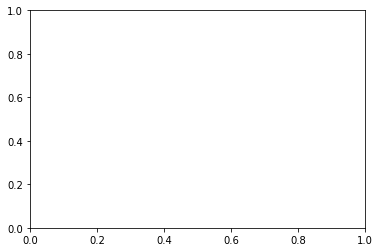

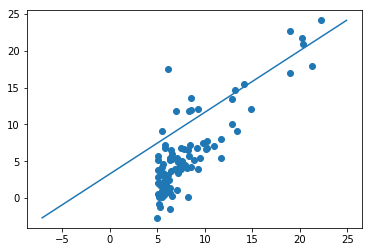

In [147]:
plt.show()